In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)
import numpy as np

In [2]:
train=pd.read_csv(r'C:\Users\HP\Downloads\train (2).csv')
test=pd.read_csv(r'C:\Users\HP\Downloads\test (2).csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

skewness is: 1.8828757597682129


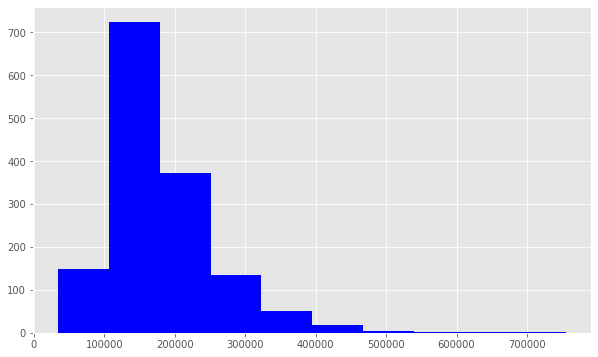

In [15]:
print('skewness is:',train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')

plt.show()

skew is: 0.12133506220520406


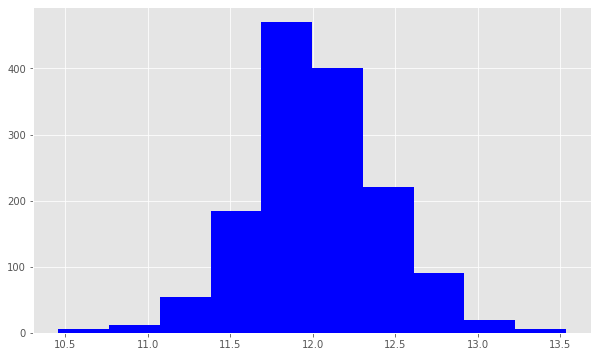

In [18]:
target=np.log(train.SalePrice)
print("skew is:",target.skew())
plt.hist(target,color='blue')
plt.show()

In [19]:
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [20]:
corr=numeric_features.corr()


In [21]:
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [22]:
print(corr['SalePrice'].sort_values(ascending=False)[:5],'\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [23]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [24]:
quality_pivot=train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [25]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


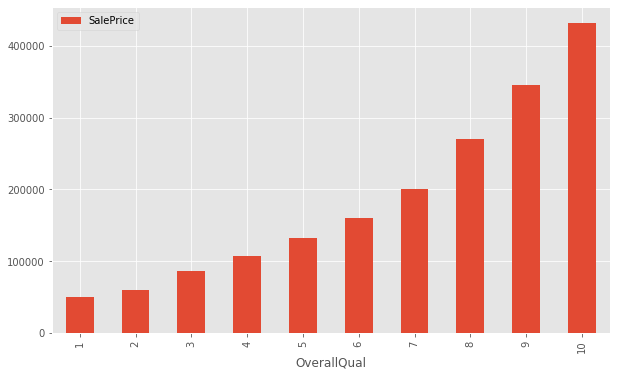

In [26]:
quality_pivot.plot(kind='bar')

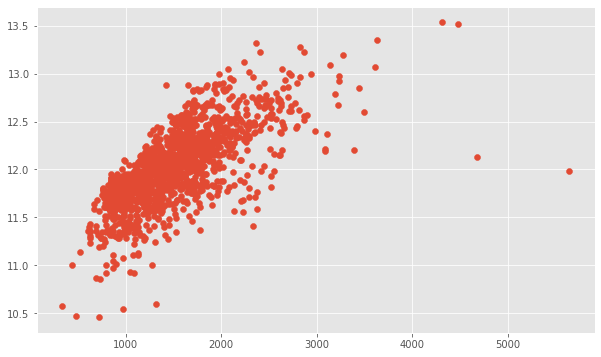

In [28]:
plt.scatter(x=train['GrLivArea'],y=target)

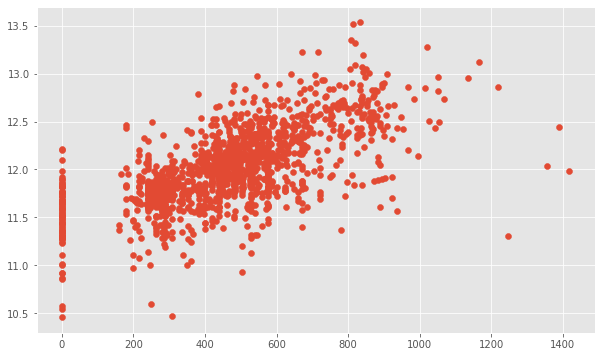

In [29]:
plt.scatter(x=train['GarageArea'],y=target)

In [30]:
train=train[train['GarageArea']<1200]

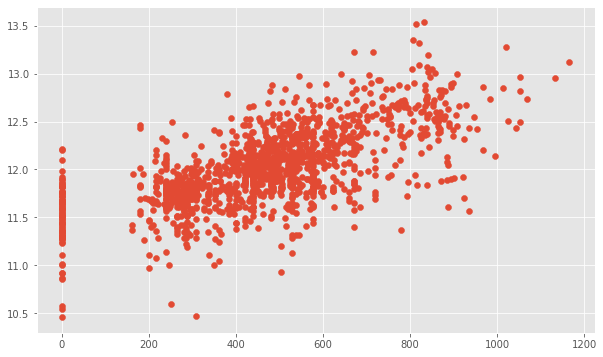

In [32]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))

In [34]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1449
MiscFeature      1402
Alley            1364
Fence            1174
FireplaceQu       689
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [36]:
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['NullCount']
nulls.index.name='Feature'

In [37]:
nulls

,NullCount
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [38]:
print("unique values are:",train.MiscFeature.unique())

unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [40]:
categorical_columns=train.select_dtypes(exclude=[np.number])
categorical_columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [42]:
print('Original: \n')
print(train.Street.value_counts(),'\n')



Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [43]:
train['enc_street']=pd.get_dummies(train.Street,drop_first=True)
test['enc_street']=pd.get_dummies(test.Street,drop_first=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
print('Encoder: \n')
print(train.enc_street.value_counts())

Encoder: 

1    1450
0       5
Name: enc_street, dtype: int64


In [45]:
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot


,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,242300


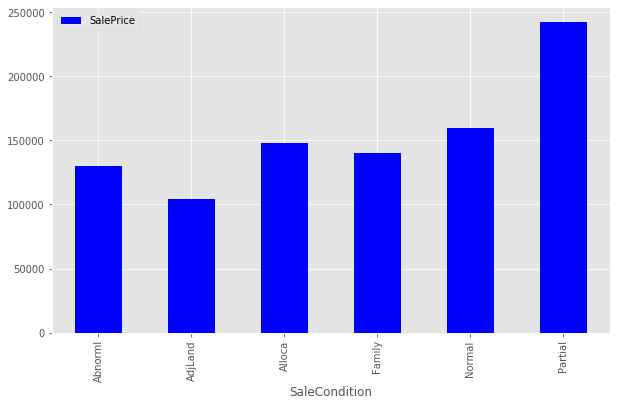

In [46]:
condition_pivot.plot(kind='bar',color='blue')


In [47]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()


In [48]:
sum(data.isnull().sum()!=0)

0

In [50]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'],axis=1)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.33)

In [58]:
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

In [55]:
xtrain.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street
1101,20,61.000000,9758,5,5,1971,1971,0.0,412,287,...,0,0,0,0,0,0,0,7,2007,1
845,85,87.500000,16647,5,5,1975,1981,0.0,1390,0,...,0,0,0,0,0,0,0,1,2007,1
615,85,80.000000,8800,6,7,1963,1963,156.0,763,0,...,120,0,0,0,0,0,0,5,2010,1
1324,20,75.000000,9986,8,5,2006,2007,428.0,0,0,...,0,49,0,0,0,0,0,2,2007,1
308,30,98.666667,12342,4,5,1940,1950,0.0,262,0,...,158,0,0,0,0,0,0,3,2009,1


In [59]:
print("r2 score:",model.score(xtest,ytest))

r2 score: 0.8859523045334805


In [60]:
ypred=model.predict(xtest)

In [62]:
from sklearn.metrics import mean_squared_error
print('mean squared error:',mean_squared_error(ytest,ypred))

mean squared error: 0.018208277050125753


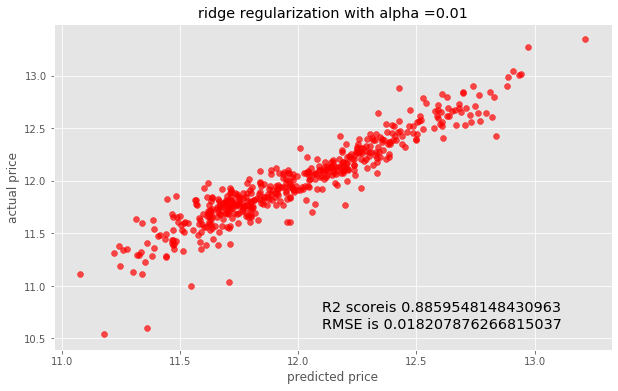

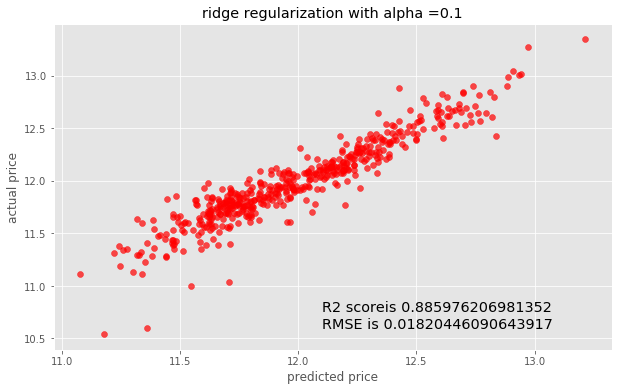

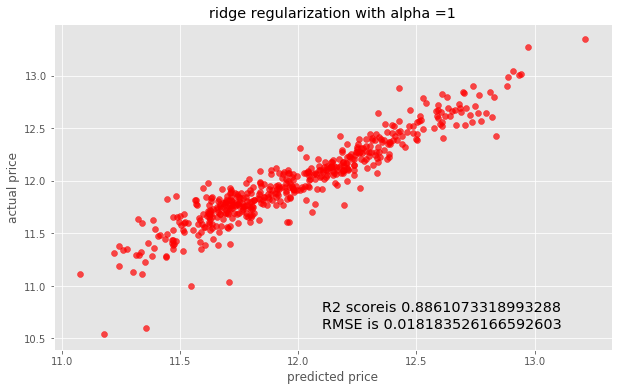

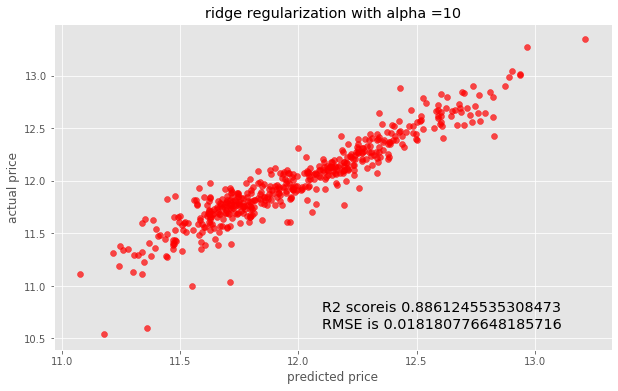

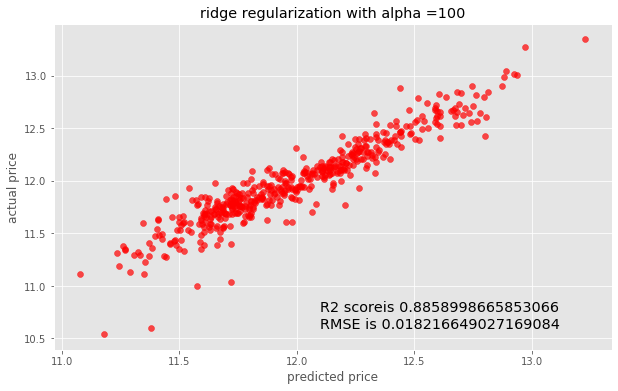

In [67]:
actual_values=ytest
from sklearn import linear_model
for i in range(-2,3):
    alpha=10**i
    rm=linear_model.Ridge(alpha=alpha)
    model=rm.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    plt.scatter(ypred,actual_values,alpha=0.7,color='red')
    plt.xlabel('predicted price')
    plt.ylabel('actual price')
    plt.title('ridge regularization with alpha ={}'.format(alpha))
    overlay='R2 scoreis {}\nRMSE is {}'.format(model.score(xtest,ytest),mean_squared_error(ypred,ytest))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    